In [3]:
import openmc
import urllib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import os

In [4]:
pitch = 1.0
pitch_to_diameters = np.linspace(1.1,2.7,12)
pitch_to_diameters = np.linspace(1.4,2.2,8)


# Prepare thermal scattering data

In [5]:
if not (os.path.exists("h1.endf")):
    url = 'https://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/H/1'
    filename, headers = urllib.request.urlretrieve(url,'h1.endf')
if not (os.path.exists("zr90.endf")):
    url = 'https://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/Zr/90'
    filename, headers = urllib.request.urlretrieve(url,'zr90.endf')


if not (os.path.exists("ENDF_c_H_in_ZrH.h5") and 
        os.path.exists("ENDF_c_Zr_in_ZrH.h5")):
    h_in_zrh  = openmc.data.ThermalScattering.from_njoy('h1.endf'  ,
                'endf_ZrH/HinZrH/tape20' ,temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')
    zr_in_zrh = openmc.data.ThermalScattering.from_njoy('zr90.endf',
                'endf_ZrH/ZrinZrH/tape20',temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')

    if os.path.exists("c_H_in_ZrH.h5"):
        os.remove( "c_H_in_ZrH.h5")
    if os.path.exists("c_Zr_in_ZrH.h5"):
        os.remove( "c_Zr_in_ZrH.h5")
    h_in_zrh.export_to_hdf5('c_H_in_ZrH.h5')
    zr_in_zrh.export_to_hdf5('c_Zr_in_ZrH.h5')

    !{'mv c_H_in_ZrH.h5  ENDF_c_H_in_ZrH.h5 '}
    !{'mv c_Zr_in_ZrH.h5 ENDF_c_Zr_in_ZrH.h5'}
        
        
if not (os.path.exists("MYZrH_c_H_in_ZrH.h5") and 
        os.path.exists("MYZrH_c_Zr_in_ZrH.h5")):
    h_in_zrh  = openmc.data.ThermalScattering.from_njoy('h1.endf'  ,
                'my_ZrH/HinZrH/tape20' ,temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')
    zr_in_zrh = openmc.data.ThermalScattering.from_njoy('zr90.endf',
                'my_ZrH/ZrinZrH/tape20',temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')

    if os.path.exists("c_H_in_ZrH.h5"):
        os.remove( "c_H_in_ZrH.h5")
    if os.path.exists("c_Zr_in_ZrH.h5"):
        os.remove( "c_Zr_in_ZrH.h5")
    h_in_zrh.export_to_hdf5('c_H_in_ZrH.h5')
    zr_in_zrh.export_to_hdf5('c_Zr_in_ZrH.h5')

    !{'mv c_H_in_ZrH.h5  MYZrH_c_H_in_ZrH.h5 '}
    !{'mv c_Zr_in_ZrH.h5 MYZrH_c_Zr_in_ZrH.h5'}
        

if not (os.path.exists("MYZrH2_c_H_in_ZrH.h5") and 
        os.path.exists("MYZrH2_c_Zr_in_ZrH.h5")):
    h_in_zrh  = openmc.data.ThermalScattering.from_njoy('h1.endf'  ,
                'my_ZrH2/HinZrH2/tape20' ,temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')
    zr_in_zrh = openmc.data.ThermalScattering.from_njoy('zr90.endf',
                'my_ZrH2/ZrinZrH2/tape20',temperatures=[293.6], 
                stdout=False, njoy_exec='/Users/ameliajo/NJOY2016/bin/njoy')

    if os.path.exists("c_H_in_ZrH.h5"):
        os.remove( "c_H_in_ZrH.h5")
    if os.path.exists("c_Zr_in_ZrH.h5"):
        os.remove( "c_Zr_in_ZrH.h5")
    h_in_zrh.export_to_hdf5('c_H_in_ZrH.h5')
    zr_in_zrh.export_to_hdf5('c_Zr_in_ZrH.h5')

    !{'mv c_H_in_ZrH.h5  MYZrH2_c_H_in_ZrH.h5 '}
    !{'mv c_Zr_in_ZrH.h5 MYZrH2_c_Zr_in_ZrH.h5'}
        

# ENDF Data

In [6]:
!{'cp  ENDF_c_H_in_ZrH.h5 /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5 '}
!{'cp ENDF_c_Zr_in_ZrH.h5 /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5'}

In [7]:
# Materials 

uo2 = openmc.Material(1, "uo2")
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16' , 2.00)
uo2.set_density('g/cm3', 10.0)

zrh = openmc.Material(2, "zrh")
zrh.add_element('Zr', 1.0)
zrh.add_element('H' , 1.0)
zrh.set_density('g/cm3', 5.8)
zrh.add_s_alpha_beta('c_H_in_ZrH')
zrh.add_s_alpha_beta('c_Zr_in_ZrH')

mats = openmc.Materials([uo2, zrh])
mats.export_to_xml()


In [8]:
# Settings
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()


In [9]:
# Geometry 


kVals_endf = []
for ratio in pitch_to_diameters:
    left    = openmc.XPlane(x0=-pitch/2, boundary_type='reflective')
    right   = openmc.XPlane(x0= pitch/2, boundary_type='reflective')
    bottom  = openmc.YPlane(y0=-pitch/2, boundary_type='reflective')
    top     = openmc.YPlane(y0= pitch/2, boundary_type='reflective')
    fuel_diameter = pitch/ratio
    fuel_or = openmc.ZCylinder(r=fuel_diameter*0.5)

    fuel_region = -fuel_or
    mod_region  = +left & -right & +bottom & -top & +fuel_or

    fuel = openmc.Cell(1, 'fuel')
    fuel.fill = uo2
    fuel.region = fuel_region

    moderator = openmc.Cell(2, 'moderator')
    moderator.fill = zrh
    moderator.region = mod_region

    root = openmc.Universe(cells=(fuel, moderator))
    geom = openmc.Geometry(root)
    geom.export_to_xml()

    # Run
    openmc.run()

    # Retrieve k-efffective
    sp = openmc.StatePoint('statepoint.100.h5')
    k = sp.k_combined.n
    kVals_endf.append(k)
    !{'rm statepoint* summary* geometry.xml'}


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.21840 +/- 0.00476
 k-effective (Track-length)  = 1.22029 +/- 0.00546
 k-effective (Absorption)    = 1.21333 +/- 0.00345
 Combined k-effective        = 1.21433 +/- 0.00333
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.27686 +/- 0.00404
 k-effective (Track-length)  = 1.28058 +/- 0.00502
 k-effective (Absorption)    = 1.27552 +/- 0.00336
 Combined k-effective        = 1.27644 +/- 0.00289
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.27481 +/- 0.00411
 k-effective (Track-length)  = 1.27781 +/- 0.00509
 k-effective (Absorption)    = 1.27806 +/- 0.00318
 Combined k-effective        = 1.27736 +/- 0.00304
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

Text(0, 0.5, 'k-effective')

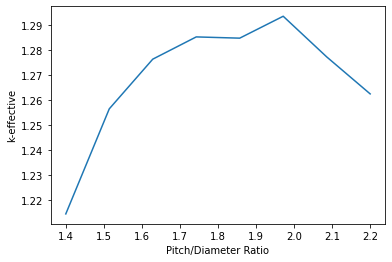

In [10]:
plt.plot(pitch_to_diameters,kVals_endf)
plt.xlabel('Pitch/Diameter Ratio')
plt.ylabel('k-effective')

# My ZrH Data

In [11]:
!{'cp MYZrH_c_H_in_ZrH.h5  /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5 '}
!{'cp MYZrH_c_Zr_in_ZrH.h5 /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5'}

In [12]:
# Geometry 

kVals_myZrH = []
for ratio in pitch_to_diameters:
    left    = openmc.XPlane(x0=-pitch/2, boundary_type='reflective')
    right   = openmc.XPlane(x0= pitch/2, boundary_type='reflective')
    bottom  = openmc.YPlane(y0=-pitch/2, boundary_type='reflective')
    top     = openmc.YPlane(y0= pitch/2, boundary_type='reflective')
    fuel_diameter = pitch/ratio
    fuel_or = openmc.ZCylinder(r=fuel_diameter*0.5)

    fuel_region = -fuel_or
    mod_region  = +left & -right & +bottom & -top & +fuel_or

    fuel = openmc.Cell(1, 'fuel')
    fuel.fill = uo2
    fuel.region = fuel_region

    moderator = openmc.Cell(2, 'moderator')
    moderator.fill = zrh
    moderator.region = mod_region

    root = openmc.Universe(cells=(fuel, moderator))
    geom = openmc.Geometry(root)
    geom.export_to_xml()

    # Run
    openmc.run()

    # Retrieve k-efffective
    sp = openmc.StatePoint('statepoint.100.h5')
    k = sp.k_combined.n
    kVals_myZrH.append(k)
    !{'rm statepoint* summary* geometry.xml'}


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.27626 +/- 0.00436
 k-effective (Track-length)  = 1.27862 +/- 0.00528
 k-effective (Absorption)    = 1.27965 +/- 0.00321
 Combined k-effective        = 1.27909 +/- 0.00307
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.28651 +/- 0.00423
 k-effective (Track-length)  = 1.28304 +/- 0.00459
 k-effective (Absorption)    = 1.28864 +/- 0.00358
 Combined k-effective        = 1.28700 +/- 0.00328
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

Text(0, 0.5, 'k-effective')

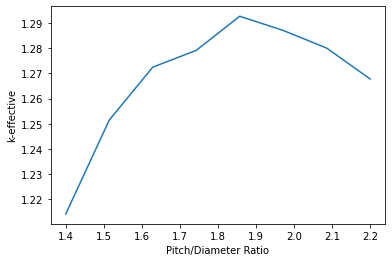

In [13]:
plt.plot(pitch_to_diameters,kVals_myZrH)
plt.xlabel('Pitch/Diameter Ratio')
plt.ylabel('k-effective')

Text(0, 0.5, 'k-effective')

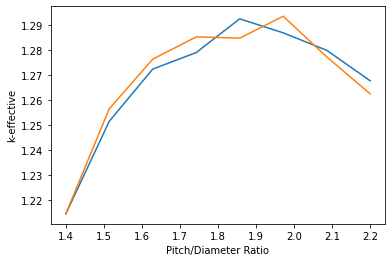

In [14]:
plt.plot(pitch_to_diameters,kVals_myZrH)
plt.plot(pitch_to_diameters,kVals_endf)
plt.xlabel('Pitch/Diameter Ratio')
plt.ylabel('k-effective')

# My ZrH$_2$ Data

In [15]:
!{'cp MYZrH2_c_H_in_ZrH.h5  /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5 '}
!{'cp MYZrH2_c_Zr_in_ZrH.h5 /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5'}

In [16]:
# Geometry 

kVals_myZrH2 = []
for ratio in pitch_to_diameters:
    left    = openmc.XPlane(x0=-pitch/2, boundary_type='reflective')
    right   = openmc.XPlane(x0= pitch/2, boundary_type='reflective')
    bottom  = openmc.YPlane(y0=-pitch/2, boundary_type='reflective')
    top     = openmc.YPlane(y0= pitch/2, boundary_type='reflective')
    fuel_diameter = pitch/ratio
    fuel_or = openmc.ZCylinder(r=fuel_diameter*0.5)

    fuel_region = -fuel_or
    mod_region  = +left & -right & +bottom & -top & +fuel_or

    fuel = openmc.Cell(1, 'fuel')
    fuel.fill = uo2
    fuel.region = fuel_region

    moderator = openmc.Cell(2, 'moderator')
    moderator.fill = zrh
    moderator.region = mod_region

    root = openmc.Universe(cells=(fuel, moderator))
    geom = openmc.Geometry(root)
    geom.export_to_xml()

    # Run
    openmc.run()

    # Retrieve k-efffective
    sp = openmc.StatePoint('statepoint.100.h5')
    k = sp.k_combined.n
    kVals_myZrH2.append(k)
    !{'rm statepoint* summary* geometry.xml'}


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.27033 +/- 0.00398
 k-effective (Track-length)  = 1.26389 +/- 0.00483
 k-effective (Absorption)    = 1.27315 +/- 0.00313
 Combined k-effective        = 1.27124 +/- 0.00296
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k         

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 k-effective (Collision)     = 1.27791 +/- 0.00414
 k-effective (Track-length)  = 1.27932 +/- 0.00455
 k-effective (Absorption)    = 1.28198 +/- 0.00326
 Combined k-effective        = 1.28093 +/- 0.00301
 Leakage Fraction            = 0.00000 +/- 0.00000

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                ####################

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


 Reading materials XML file...
 Reading geometry XML file...
 Reading U235 from /Users/ameliajo/endfb71_hdf5/U235.h5
 Reading U238 from /Users/ameliajo/endfb71_hdf5/U238.h5
 Reading O16 from /Users/ameliajo/endfb71_hdf5/O16.h5
 Reading Zr90 from /Users/ameliajo/endfb71_hdf5/Zr90.h5
 Reading Zr91 from /Users/ameliajo/endfb71_hdf5/Zr91.h5
 Reading Zr92 from /Users/ameliajo/endfb71_hdf5/Zr92.h5
 Reading Zr94 from /Users/ameliajo/endfb71_hdf5/Zr94.h5
 Reading Zr96 from /Users/ameliajo/endfb71_hdf5/Zr96.h5
 Reading H1 from /Users/ameliajo/endfb71_hdf5/H1.h5
 Reading H2 from /Users/ameliajo/endfb71_hdf5/H2.h5
 Reading c_H_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_H_in_ZrH.h5
 Reading c_Zr_in_ZrH from /Users/ameliajo/endfb71_hdf5/c_Zr_in_ZrH.h5
 Minimum neutron data temperature: 294.000000 K
 Maximum neutron data temperature: 294.000000 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000.000000 eV for U235
 Initializing source pa

//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
//anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Text(0, 0.5, 'k-effective')

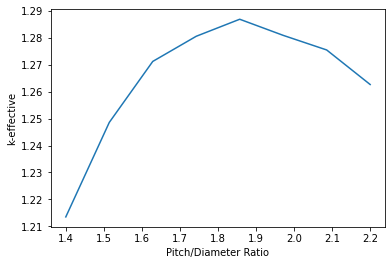

In [17]:
plt.plot(pitch_to_diameters,kVals_myZrH2)
plt.xlabel('Pitch/Diameter Ratio')
plt.ylabel('k-effective')

Text(0, 0.5, 'k-effective')

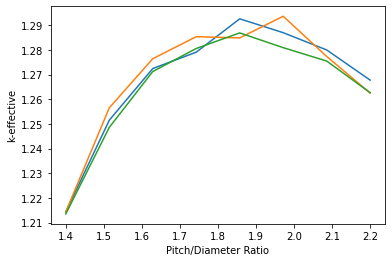

In [18]:
plt.plot(pitch_to_diameters,kVals_myZrH)
plt.plot(pitch_to_diameters,kVals_endf)
plt.plot(pitch_to_diameters,kVals_myZrH2)
plt.xlabel('Pitch/Diameter Ratio')
plt.ylabel('k-effective')